# Multiomics BRDC Paper — Figure 2

This Jupyter Notebook (with Python 3 kernel) contained the code of the proteogenomic analysis between Lesion and DCIS stages.

Input files:  
* The clinical file: clinical.csv
* The genome mutation file: mutation.csv
* The proteome file: pro.csv
* The proteome-based ssGSEA score: pscore.csv
* The MGPS score: mgps.csv

Output figures and tables:  
* Figure 2A, 2B, 2D, 2E, 2F, 2G, 2H, 2I, 2J, and 2L
* Supplementary Table 3E, 3I

In [18]:
from brdc_utils import *

import warnings
warnings.filterwarnings("ignore")

In [19]:
outpaths = ['../figure/fig2', '../documents/fig2']
for outpath in outpaths:
    if not os.path.isdir(outpath):
        os.mkdir(outpath)

clinical = pd.read_csv('../document/clinical.csv', index_col=0)
mut = pd.read_csv('../document/mutation.csv', index_col=0)
pro = pd.read_csv('../document/proteome.csv', index_col=0)
pscore = pd.read_csv('../document/pscore.csv', index_col=0)
mgps = pd.read_csv('../document/mgps.csv', index_col=0)

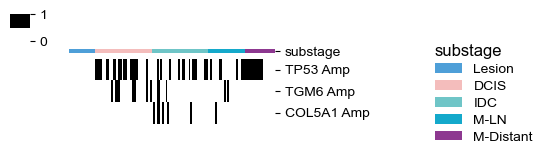

In [20]:
# Figure 2A (left panel)

order_ = ['Lesion', 'DCIS', 'IDC', 'M-LN', 'M-Distant']
lut = {'substage': dict(zip(order_, ['#4e9fd8', '#f4bdbc', '#6fc5c7', '#14a9cb', '#8d3890']))}

cli = sort_custom(clinical.query("substage in @order_")['substage'], order=order_, label=['substage'])
plotdata = pd.merge(left=mut.loc[['TP53', 'TGM6', 'COL5A1']].T, right=cli, left_index=True, right_index=True, how='right').dropna().set_index('substage', append=True).T.rename_axis('cnv')

cmap = ['white', 'black']
ax = heatmap(plotdata, lut=lut, cmap=cmap, figsize=(4, 1.5), yticklabels=plotdata.index+' Amp', vmax=1, vmin=0, center=.5, colors_ratio=.05)
ax.savefig('../figure/fig2/figure2A_heatmap.pdf', bbox_inches='tight')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


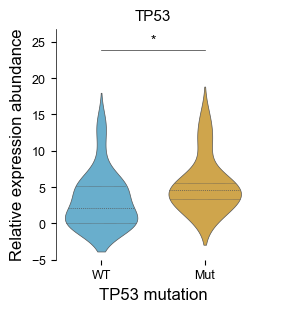

In [21]:
# Figure 2B (left panel)

df = combine(clinical, pro, 'TP53 mutation', 'TP53', how='inner')
ax = cateplot(df, category_type=['violin'], order=['WT', 'Mut'], method='ranksums', inner='quart', violin_linewidth=0.5, dodge=False, palette=['#58b5dd', '#e5ad36'], violinalpha=1, one_tile=True)
ax.set_ylabel('Relative expression abundance')
ax.get_figure().savefig('../figure/fig2/figure2B_left-panel_cateplot.pdf', bbox_inches='tight')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


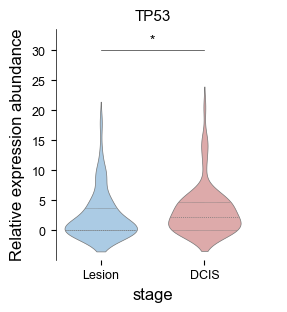

In [22]:
# Figure 2B (right panel)

df = combine(clinical, pro, 'stage', 'TP53', how='inner', part_element=['Lesion', 'DCIS'])
ax = cateplot(df, category_type=['violin'], order=['Lesion', 'DCIS'], method='ranksums', inner='quart', violin_linewidth=0.5, dodge=False, palette=['#a1ccee', '#e5a2a2'], violinalpha=1)
ax.set_ylabel('Relative expression abundance')
ax.get_figure().savefig('../figure/fig2/figure2B_right-panel_cateplot.pdf', bbox_inches='tight')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


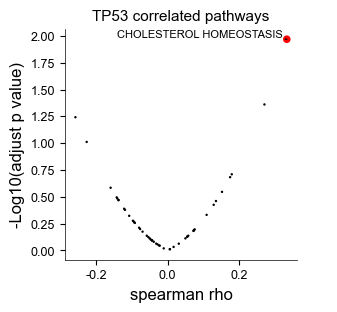

In [23]:
# Figure 2D, Supplementary Table S3E

tp53 = combine(clinical, pro, 'stage', ['TP53'], how='inner', part_element=['Lesion', 'DCIS'])
table = pscore.apply(correlation, y=tp53['TP53'].droplevel(1), axis=1, result_type='expand')
table.columns = 'pearson corr', 'pearson prob', 'spearman rho', 'spearman prob'
table['spearman fdr'] = fdr(table['spearman prob'])[1]
out_table = table.filter(like='HALLMARK', axis=0).sort_values('spearman prob')
plotdata = out_table[['spearman rho', 'spearman fdr']]
plotdata.iloc[:, 1] = -np.log10(plotdata.iloc[:, 1])
plotdata.loc['HALLMARK_CHOLESTEROL_HOMEOSTASIS', 'annot'] = 'annotated'
plotdata.loc[:, 'annot'] = plotdata.loc[:, 'annot'].fillna('others')
plotdata['size'] = plotdata['annot']
ax = scatterplot(plotdata.iloc[:, [0, 2, 1]], highlight_points=['HALLMARK_CHOLESTEROL_HOMEOSTASIS'], title='TP53 correlated pathways', palette=['red', 'black'], sizes=(3, 30), ticklabels_format=[], ticklabels_hide=[], legend=False)
ax.set_ylabel('-Log10(adjust p value)')
ax.get_figure().savefig('../figure/fig2/figure2D_scatterplot.pdf', bbox_inches='tight')

out_table = out_table.iloc[:, 2:]
out_table.columns = 'Spearman rho', 'Spearman p value', 'Spearman FDR'
out_table.to_csv('../documents/fig2/Supplementary_Table_3E.csv')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


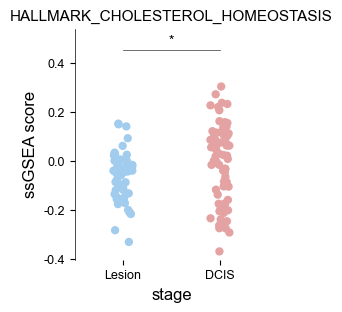

In [24]:
# Figure 2E

tp53_choles = combine(clinical, pscore, 'stage', ['HALLMARK_CHOLESTEROL_HOMEOSTASIS'], how='inner', part_element=['Lesion', 'DCIS'])
ax = cateplot(tp53_choles, category_type=['strip'], order=['Lesion', 'DCIS'], method='ranksums', inner='quart', violin_linewidth=0.5, dodge=False, palette=['#a1ccee', '#e5a2a2'], stripalpha=1, ticklabels_format=[], log_transform='no')
ax.set_ylabel('ssGSEA score')
ax.set_xlim([-.5, 1.5])
ax.get_figure().savefig('../figure/fig2/figure2E_cateplot.pdf', bbox_inches='tight')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


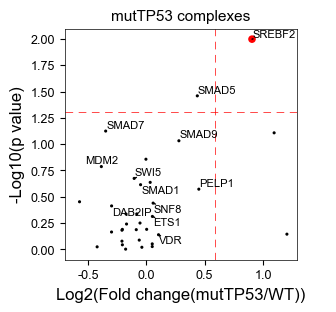

In [25]:
# Figure 2F

genes = ['TP53', 'SREBF2', 'E2F1', 'EP300', 'SMAD1', 'SMAD3', 'SMAD5', 'SMAD9', 'MDM2', 'NFYA', 'NFYB', 'NFYC', 'NRF1', 'RAC1', 'VDR', 'YAP1', 'TOPBP1', 'PELP1', 'SWI5', 'BAG2', 'BAG5', 'DAB2IP', 'E2F4', 'ETS1', 'ETS2', 'HSF1', 'MRE11', 'PIN1', 'PLK2', 'SMAD2', 'SMAD4', 'SMAD7', 'SNF8', 'SP1', 'TP63']
df = combine(clinical, pro, 'TP53 mutation', genes, how='inner')
plotdata = group_table(df.droplevel(0), method='median', prestatistic_method=None).iloc[:, [2, 3]]
plotdata.iloc[:, 0] = np.log2(plotdata.iloc[:, 0])
plotdata.iloc[:, 1] = -np.log10(plotdata.iloc[:, 1])
plotdata = plotdata[plotdata.iloc[:, 0]>-1]
plotdata.columns = ['Log2(Fold change(mutTP53/WT))', '-Log10(p value)']
plotdata.loc['SREBF2', 'annot'] = 'highlight'
plotdata['annot'] = plotdata['annot'].fillna('others')

ax = scatterplot(plotdata.iloc[:, [0, 2, 1]], ticklabels_format=[], ticklabels_hide=[], highlight_points=['SREBF2', 'SMAD5', 'SMAD7', 'SWI5', 'SMAD9', 'PLK2', 'MDM2', 'DAB2IP', 'SMAD1', 'SNF8', 'ETS1', 'VDR', 'PELP1'], palette=['black', 'red'], sizes=(30, 5), legend=False, spines_hide=[], title='mutTP53 complexes')
ax.set_xlim([-.7, ax.get_xlim()[1]])
ax.axhline(y=-np.log10(0.05), c="red", ls="--", dashes=(11, 8), lw=0.5)
ax.axvline(x=np.log2(1.5), c="red", ls="--", dashes=(11, 8), lw=0.5)
ax.get_figure().savefig('../figure/fig2/figure2F_scatterplot.pdf', bbox_inches='tight')

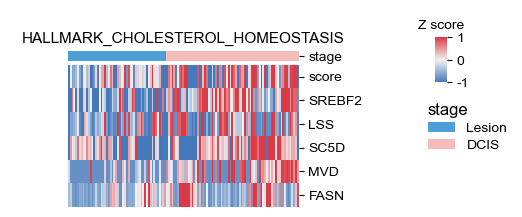

In [26]:
# Figure 2G

gene = ['SREBF2', 'LSS', 'SC5D', 'MVD', 'FASN']
tmp = pd.concat([pscore.loc[['HALLMARK_CHOLESTEROL_HOMEOSTASIS']], pro.loc[gene]])
plotdata = combine(clinical, tmp, 'stage', how='inner', part_element=['Lesion', 'DCIS']).rename_axis('term', axis=1).rename(columns={'HALLMARK_CHOLESTEROL_HOMEOSTASIS': 'score'})

lut = {'stage': dict(zip(['Lesion', 'DCIS'], ['#4e9fd8', '#f4bdbc']))}

cmap = sns.diverging_palette(250, 10, n=30, as_cmap=True)
ax = heatmap(plotdata.droplevel(0).T.sort_index(axis=1, ascending=False), lut=lut, cmap=cmap, figsize=(4, 2.5), colors_ratio=.05, z_score=0, cbar_pos=(1.1, .65, .03, .18))
ax.ax_col_colors.set_title('HALLMARK_CHOLESTEROL_HOMEOSTASIS', fontsize=11)
ax.ax_cbar.set_title('Z score', fontsize=10)
ax.savefig('../figure/fig2/figure2G_heatmap.pdf', bbox_inches='tight')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


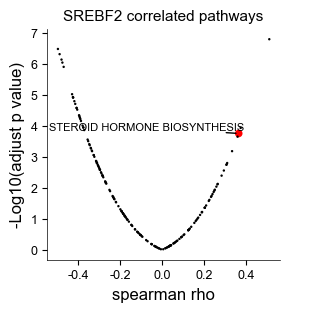

In [27]:
# Figure 2H, Supplementary_Table_S3I

srebf2 = combine(clinical, pro, 'stage', ['SREBF2'], how='inner', part_element=['Lesion', 'DCIS'])
table = pscore.apply(correlation, y=srebf2['SREBF2'].droplevel(1), axis=1, result_type='expand')
table.columns = 'pearson corr', 'pearson prob', 'spearman rho', 'spearman prob'
table['spearman fdr'] = fdr(table['spearman prob'])[1]
out_table= table.filter(like='KEGG', axis=0).sort_values('spearman prob')
plotdata = out_table[['spearman rho', 'spearman fdr']]
plotdata.iloc[:, 1] = -np.log10(plotdata.iloc[:, 1])
plotdata.loc['KEGG_STEROID_HORMONE_BIOSYNTHESIS', 'annot'] = 'annotated'
plotdata.loc[:, 'annot'] = plotdata.loc[:, 'annot'].fillna('others')
plotdata['size'] = plotdata['annot']
ax = scatterplot(plotdata.iloc[:, [0, 2, 1]], highlight_points=['KEGG_STEROID_HORMONE_BIOSYNTHESIS'], title='SREBF2 correlated pathways', palette=['black', 'red'], sizes=[3, 30], ticklabels_format=[], ticklabels_hide=[], legend=False)
ax.set_ylabel('-Log10(adjust p value)')
ax.get_figure().savefig('../figure/fig2/figure2H_scatterplot.pdf', bbox_inches='tight')

out_table = out_table.iloc[:, 2:-1]
out_table.columns = 'Spearman rho', 'Spearman p value'
out_table.to_csv('../documents/fig2/Supplementary_Table_3I.csv')

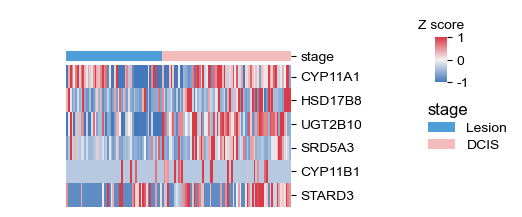

In [28]:
# Figure 2I

gene = ['CYP11A1', 'HSD17B8', 'UGT2B10', 'SRD5A3', 'CYP11B1', 'STARD3']
plotdata = combine(clinical, pro, 'stage', gene, how='inner', part_element=['Lesion', 'DCIS']).rename_axis('term', axis=1)

lut = {'stage': dict(zip(['Lesion', 'DCIS'], ['#4e9fd8', '#f4bdbc']))}

cmap = sns.diverging_palette(250, 10, n=30, as_cmap=True)
ax = heatmap(plotdata.droplevel(0).T.sort_index(axis=1, ascending=False), lut=lut, cmap=cmap, figsize=(4, 2.5), colors_ratio=.05, z_score=0, cbar_pos=(1.1, .65, .03, .18))
ax.ax_cbar.set_title('Z score', fontsize=10)
ax.savefig('../figure/fig2/figure2I_heatmap.pdf', bbox_inches='tight')

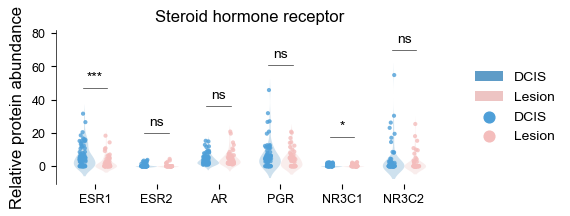

In [29]:
# Figure 2J

gene = ['ESR1', 'ESR2', 'AR', 'PGR', 'NR3C1', 'NR3C2']
plotdata = combine(clinical, pro, 'stage', gene, how='inner', part_element=['Lesion', 'DCIS']).rename_axis('term', axis=1)
plotdata = plotdata.droplevel(0).unstack()
ax = cateplot(plotdata.reset_index(), category_type=['violin', 'strip'], figsize=(5, 2), palette=['#4e9fd8', '#f4bdbc'], dodge=True, stripsize=3)
ax.set_ylabel('Relative protein abundance')
ax.set_xlabel('')
ax.set_title('Steroid hormone receptor')
ax.get_figure().savefig('../figure/fig2/figure2J_cateplot.pdf', bbox_inches='tight')


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


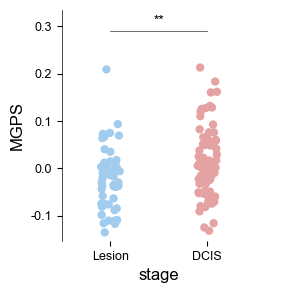

In [30]:
# Figure 2L

plotdata = combine(clinical, mgps, 'stage', 'mgps', how='inner', part_element=['Lesion', 'DCIS']).rename_axis('term', axis=1)
ax = cateplot(plotdata, category_type=['strip'], order=['Lesion', 'DCIS'], dodge=False, palette=['#a1ccee', '#e5a2a2'], stripalpha=1, ticklabels_format=[], log_transform='no')
ax.set_ylabel('MGPS')
ax.set_title('')
ax.set_xlim([-.5, 1.5])
ax.get_figure().savefig('../figure/fig2/figure2L_cateplot.pdf', bbox_inches='tight')